#                                 DATA SCIENCE CHALLENGE
## Use the data set given to:
## 1. plot a graph that measures the rate at which people are infected in each continent        represented.
## 2. plot another graph for the growth of cases worldwide over the period.
## 3. plot a graph that shows the death rates for the world over the period.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry as p
import pycountry_convert as pc
import sys
import os

In [2]:
sys.getrecursionlimit()

3000

In [3]:
sys.setrecursionlimit(10000)

In [4]:
os.getcwd()

'C:\\Users\\reuben.amofah'

In [5]:
os.chdir('C:/Users/reuben.amofah/Desktop/Datascience/Frank T/Working folder')

In [6]:
os.getcwd()

'C:\\Users\\reuben.amofah\\Desktop\\Datascience\\Frank T\\Working folder'

## Importing data from excel file.

In [7]:
data_set=pd.read_excel('covid-19-geographic-disbtribution-worldwide-2020-04-07.xlsx', parse_date='Dates')
data_set

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
2,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
3,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
9305,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9306,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
9307,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9308,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [8]:
data_set.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018'],
      dtype='object')

## Checking first and last 40 rows of data to see nature of entries.

In [9]:
data_set.head(40)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
2,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
3,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
5,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
6,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
7,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
8,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
9,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0


In [10]:
data_set.tail(40)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
9270,2020-01-01,1,1,2020,0,0,Vietnam,VN,VNM,95540395.0
9271,2019-12-31,31,12,2019,0,0,Vietnam,VN,VNM,95540395.0
9272,2020-04-07,7,4,2020,0,0,Zambia,ZM,ZMB,17351822.0
9273,2020-04-06,6,4,2020,0,0,Zambia,ZM,ZMB,17351822.0
9274,2020-04-05,5,4,2020,0,0,Zambia,ZM,ZMB,17351822.0
9275,2020-04-04,4,4,2020,0,0,Zambia,ZM,ZMB,17351822.0
9276,2020-04-03,3,4,2020,3,1,Zambia,ZM,ZMB,17351822.0
9277,2020-04-02,2,4,2020,1,0,Zambia,ZM,ZMB,17351822.0
9278,2020-04-01,1,4,2020,0,0,Zambia,ZM,ZMB,17351822.0
9279,2020-03-31,31,3,2020,6,0,Zambia,ZM,ZMB,17351822.0


## Checking for columns with null values and cleaning the data to enhance analysis.

In [11]:
data_set.isnull().sum()

dateRep                      0
day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
geoId                       24
countryterritoryCode       185
popData2018                138
dtype: int64

In [12]:
data_set.replace({'countriesAndTerritories':'Cases_on_an_international_conveyance_Japan'},'Japan',inplace=True)
data_set.replace({'countriesAndTerritories':'_'},' ',regex=True,inplace=True)
data_set.replace({'countriesAndTerritories':'Bonaire, Saint Eustatius and Saba'},'Netherlands',inplace=True)
data_set.replace({'countriesAndTerritories':'Cote dIvoire'},'Ivory Coast',inplace=True)
data_set.replace({'countriesAndTerritories':'CuraÃ§ao'},'Netherlands',inplace=True)
data_set.replace({'countriesAndTerritories':'Guinea Bissau'},'Guinea',inplace=True)
data_set.replace({'countriesAndTerritories':'Holy See'},'Italy',inplace=True)
data_set.replace({'countriesAndTerritories':'Kosovo'},'Serbia',inplace=True)
data_set.replace({'countriesAndTerritories':'Sint Maarten'},'Netherlands',inplace=True)
data_set.replace({'countriesAndTerritories':'Timor Leste'},'Portugal',inplace=True)
data_set.replace({'countriesAndTerritories':'Turks and Caicos islands'},'United Kingdom',inplace=True)

data_set

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
2,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
3,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
9305,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9306,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
9307,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9308,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


# 1. Analyses of rate of infections in each continent represented.

## Determining the respective continents of the affected countries.

In [13]:
def continent (x):
    country_code = pc.country_name_to_country_alpha2(x)
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    return continent_name

In [14]:
data_set['continents']=data_set['countriesAndTerritories'].apply(continent)
data_set

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
0,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
9305,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
9306,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
9307,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
9308,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


## List of affected countries and territories. 

In [15]:
data_set['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'Algeria', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Netherlands',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Japan', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', 'Ivory Coast', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands (Malvinas)',
       'Faroe Is

## List of continents represented.

In [16]:
data_set['continents'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

## Grouping countries according to their continents.

In [17]:
data_group= data_set.groupby('continents')
data_group

In [18]:
for groups,data in data_group:
    print(groups)
    
    print(data,'\n')

Africa
        dateRep  day  month  year  cases  deaths countriesAndTerritories  \
129  2020-04-07    7      4  2020    103      21                 Algeria   
130  2020-04-06    6      4  2020     20      22                 Algeria   
131  2020-04-05    5      4  2020    314      47                 Algeria   
132  2020-04-04    4      4  2020    139      25                 Algeria   
133  2020-04-03    3      4  2020      0       0                 Algeria   
...         ...  ...    ...   ...    ...     ...                     ...   
9305 2020-03-25   25      3  2020      0       0                Zimbabwe   
9306 2020-03-24   24      3  2020      0       1                Zimbabwe   
9307 2020-03-23   23      3  2020      0       0                Zimbabwe   
9308 2020-03-22   22      3  2020      1       0                Zimbabwe   
9309 2020-03-21   21      3  2020      1       0                Zimbabwe   

     geoId countryterritoryCode  popData2018 continents  
129     DZ            

#  Rate of infections per continent on monthly basis.
# 1. Africa

In [19]:
data_africa=data_group.get_group('Africa')
data_africa

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
129,2020-04-07,7,4,2020,103,21,Algeria,DZ,DZA,42228429.0,Africa
130,2020-04-06,6,4,2020,20,22,Algeria,DZ,DZA,42228429.0,Africa
131,2020-04-05,5,4,2020,314,47,Algeria,DZ,DZA,42228429.0,Africa
132,2020-04-04,4,4,2020,139,25,Algeria,DZ,DZA,42228429.0,Africa
133,2020-04-03,3,4,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...
9305,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
9306,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
9307,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
9308,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


## Grouping African cases on monthly basis

In [20]:
africa_months=data_africa.groupby('month')
africa_months

In [21]:
for afr,month1 in africa_months:
    print(afr)
    
    print(month1,'\n')

1
        dateRep  day  month  year  cases  deaths countriesAndTerritories  \
191  2020-01-31   31      1  2020      0       0                 Algeria   
192  2020-01-30   30      1  2020      0       0                 Algeria   
193  2020-01-29   29      1  2020      0       0                 Algeria   
194  2020-01-28   28      1  2020      0       0                 Algeria   
195  2020-01-27   27      1  2020      0       0                 Algeria   
...         ...  ...    ...   ...    ...     ...                     ...   
6352 2020-01-05    5      1  2020      0       0                 Nigeria   
6353 2020-01-04    4      1  2020      0       0                 Nigeria   
6354 2020-01-03    3      1  2020      0       0                 Nigeria   
6355 2020-01-02    2      1  2020      0       0                 Nigeria   
6356 2020-01-01    1      1  2020      0       0                 Nigeria   

     geoId countryterritoryCode  popData2018 continents  
191     DZ                 

## December_31_2019

In [22]:
afr_dec=africa_months.get_group(12)
afr_dec

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
222,2019-12-31,31,12,2019,0,0,Algeria,DZ,DZA,42228429.0,Africa
2710,2019-12-31,31,12,2019,0,0,Egypt,EG,EGY,98423595.0,Africa
6357,2019-12-31,31,12,2019,0,0,Nigeria,NG,NGA,195874740.0,Africa


In [23]:
a1=afr_dec['cases'].sum()
a1

0

## January_31_2020

In [24]:
afr_jan=africa_months.get_group(1)
afr_jan

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
191,2020-01-31,31,1,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
192,2020-01-30,30,1,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
193,2020-01-29,29,1,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
194,2020-01-28,28,1,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
195,2020-01-27,27,1,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...
6352,2020-01-05,5,1,2020,0,0,Nigeria,NG,NGA,195874740.0,Africa
6353,2020-01-04,4,1,2020,0,0,Nigeria,NG,NGA,195874740.0,Africa
6354,2020-01-03,3,1,2020,0,0,Nigeria,NG,NGA,195874740.0,Africa
6355,2020-01-02,2,1,2020,0,0,Nigeria,NG,NGA,195874740.0,Africa


In [25]:
b1=afr_jan['cases'].sum()
b1

0

## February_29_2020

In [26]:
afr_feb=africa_months.get_group(2)
afr_feb

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
162,2020-02-29,29,2,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
163,2020-02-28,28,2,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
164,2020-02-27,27,2,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
165,2020-02-26,26,2,2020,1,0,Algeria,DZ,DZA,42228429.0,Africa
166,2020-02-25,25,2,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...
6321,2020-02-05,5,2,2020,0,0,Nigeria,NG,NGA,195874740.0,Africa
6322,2020-02-04,4,2,2020,0,0,Nigeria,NG,NGA,195874740.0,Africa
6323,2020-02-03,3,2,2020,0,0,Nigeria,NG,NGA,195874740.0,Africa
6324,2020-02-02,2,2,2020,0,0,Nigeria,NG,NGA,195874740.0,Africa


In [27]:
c1=afr_feb['cases'].sum()
c1

3

## March_31_2020

In [28]:
afr_mar=africa_months.get_group(3)
afr_mar

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
136,2020-03-31,31,3,2020,57,2,Algeria,DZ,DZA,42228429.0,Africa
137,2020-03-30,30,3,2020,45,3,Algeria,DZ,DZA,42228429.0,Africa
138,2020-03-29,29,3,2020,104,5,Algeria,DZ,DZA,42228429.0,Africa
139,2020-03-28,28,3,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
140,2020-03-27,27,3,2020,41,4,Algeria,DZ,DZA,42228429.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...
9305,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
9306,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
9307,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
9308,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [29]:
d1=afr_mar['cases'].sum()
d1

5061

## April_7_2020

In [30]:
afr_apr=africa_months.get_group(4)
afr_apr

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
129,2020-04-07,7,4,2020,103,21,Algeria,DZ,DZA,42228429.0,Africa
130,2020-04-06,6,4,2020,20,22,Algeria,DZ,DZA,42228429.0,Africa
131,2020-04-05,5,4,2020,314,47,Algeria,DZ,DZA,42228429.0,Africa
132,2020-04-04,4,4,2020,139,25,Algeria,DZ,DZA,42228429.0,Africa
133,2020-04-03,3,4,2020,0,0,Algeria,DZ,DZA,42228429.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...
9294,2020-04-05,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
9295,2020-04-04,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
9296,2020-04-03,3,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
9297,2020-04-02,2,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [31]:
e1=afr_apr['cases'].sum()
e1

4740

## Dataframe showing rate of infections in Africa.

In [32]:
africa_infection_rate={'Dec_31':[a1],'Jan_31':[a1+b1],'Feb_29':[a1+b1+c1],'Mar_31':[a1+b1+c1+d1],'Apr_7':[a1+b1+c1+d1+e1]}
rate_afr = pd.DataFrame(africa_infection_rate)
rate_afr

,Dec_31,Jan_31,Feb_29,Mar_31,Apr_7
0,0,0,3,5064,9804


# 2. Europe

In [33]:
data_europe=data_group.get_group('Europe')
data_europe

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
89,2020-04-07,7,4,2020,16,1,Albania,AL,ALB,2866376.0,Europe
90,2020-04-06,6,4,2020,28,2,Albania,AL,ALB,2866376.0,Europe
91,2020-04-05,5,4,2020,29,2,Albania,AL,ALB,2866376.0,Europe
92,2020-04-04,4,4,2020,27,1,Albania,AL,ALB,2866376.0,Europe
93,2020-04-03,3,4,2020,18,1,Albania,AL,ALB,2866376.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
8966,2020-01-04,4,1,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe
8967,2020-01-03,3,1,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe
8968,2020-01-02,2,1,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe
8969,2020-01-01,1,1,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe


## Grouping European cases on monthly basis

In [34]:
europe_months=data_europe.groupby('month')
europe_months

In [35]:
for eur,month2 in europe_months:
    print(eur)
    
    print(month2,'\n')

1
        dateRep  day  month  year  cases  deaths countriesAndTerritories  \
590  2020-01-31   31      1  2020      0       0                 Austria   
591  2020-01-30   30      1  2020      0       0                 Austria   
592  2020-01-29   29      1  2020      0       0                 Austria   
593  2020-01-28   28      1  2020      0       0                 Austria   
594  2020-01-27   27      1  2020      0       0                 Austria   
...         ...  ...    ...   ...    ...     ...                     ...   
8965 2020-01-05    5      1  2020      0       0          United Kingdom   
8966 2020-01-04    4      1  2020      0       0          United Kingdom   
8967 2020-01-03    3      1  2020      0       0          United Kingdom   
8968 2020-01-02    2      1  2020      0       0          United Kingdom   
8969 2020-01-01    1      1  2020      0       0          United Kingdom   

     geoId countryterritoryCode  popData2018 continents  
590     AT                 

## December_31_2019

In [36]:
eur_dec=europe_months.get_group(12)
eur_dec

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
621,2019-12-31,31,12,2019,0,0,Austria,AT,AUT,8847037.0,Europe
968,2019-12-31,31,12,2019,0,0,Belarus,BY,BLR,9485386.0,Europe
1067,2019-12-31,31,12,2019,0,0,Belgium,BE,BEL,11422068.0,Europe
2105,2019-12-31,31,12,2019,0,0,Croatia,HR,HRV,4089400.0,Europe
2270,2019-12-31,31,12,2019,0,0,Czechia,CZ,NaN,NaN,Europe
2395,2019-12-31,31,12,2019,0,0,Denmark,DK,DNK,5797446.0,Europe
2865,2019-12-31,31,12,2019,0,0,Estonia,EE,EST,1320884.0,Europe
3050,2019-12-31,31,12,2019,0,0,Finland,FI,FIN,5518050.0,Europe
3149,2019-12-31,31,12,2019,0,0,France,FR,FRA,66987244.0,Europe
3410,2019-12-31,31,12,2019,0,0,Germany,DE,DEU,82927922.0,Europe


In [37]:
a2=eur_dec['cases'].sum()
a2


0

## January_31_2020

In [38]:
eur_jan=europe_months.get_group(1)
eur_jan

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
590,2020-01-31,31,1,2020,0,0,Austria,AT,AUT,8847037.0,Europe
591,2020-01-30,30,1,2020,0,0,Austria,AT,AUT,8847037.0,Europe
592,2020-01-29,29,1,2020,0,0,Austria,AT,AUT,8847037.0,Europe
593,2020-01-28,28,1,2020,0,0,Austria,AT,AUT,8847037.0,Europe
594,2020-01-27,27,1,2020,0,0,Austria,AT,AUT,8847037.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
8965,2020-01-05,5,1,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe
8966,2020-01-04,4,1,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe
8967,2020-01-03,3,1,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe
8968,2020-01-02,2,1,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe


In [39]:
b2=eur_jan['cases'].sum()
b2

17

## February_29_2020

In [40]:
eur_feb=europe_months.get_group(2)
eur_feb

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
561,2020-02-29,29,2,2020,2,0,Austria,AT,AUT,8847037.0,Europe
562,2020-02-28,28,2,2020,3,0,Austria,AT,AUT,8847037.0,Europe
563,2020-02-27,27,2,2020,0,0,Austria,AT,AUT,8847037.0,Europe
564,2020-02-26,26,2,2020,2,0,Austria,AT,AUT,8847037.0,Europe
565,2020-02-25,25,2,2020,0,0,Austria,AT,AUT,8847037.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
8934,2020-02-05,5,2,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe
8935,2020-02-04,4,2,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe
8936,2020-02-03,3,2,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe
8937,2020-02-02,2,2,2020,0,0,United Kingdom,UK,GBR,66488991.0,Europe


In [41]:
c2=eur_feb['cases'].sum()
c2

1103

## March_31_2020

In [42]:
eur_mar=europe_months.get_group(3)
eur_mar

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
96,2020-03-31,31,3,2020,11,2,Albania,AL,ALB,2866376.0,Europe
97,2020-03-30,30,3,2020,15,0,Albania,AL,ALB,2866376.0,Europe
98,2020-03-29,29,3,2020,11,1,Albania,AL,ALB,2866376.0,Europe
99,2020-03-28,28,3,2020,12,3,Albania,AL,ALB,2866376.0,Europe
100,2020-03-27,27,3,2020,28,1,Albania,AL,ALB,2866376.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
8905,2020-03-05,5,3,2020,34,0,United Kingdom,UK,GBR,66488991.0,Europe
8906,2020-03-04,4,3,2020,11,0,United Kingdom,UK,GBR,66488991.0,Europe
8907,2020-03-03,3,3,2020,4,0,United Kingdom,UK,GBR,66488991.0,Europe
8908,2020-03-02,2,3,2020,13,0,United Kingdom,UK,GBR,66488991.0,Europe


In [43]:
d2=eur_mar['cases'].sum()
d2

405921

## April_7_2020

In [44]:
eur_apr=europe_months.get_group(4)
eur_apr

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
89,2020-04-07,7,4,2020,16,1,Albania,AL,ALB,2866376.0,Europe
90,2020-04-06,6,4,2020,28,2,Albania,AL,ALB,2866376.0,Europe
91,2020-04-05,5,4,2020,29,2,Albania,AL,ALB,2866376.0,Europe
92,2020-04-04,4,4,2020,27,1,Albania,AL,ALB,2866376.0,Europe
93,2020-04-03,3,4,2020,18,1,Albania,AL,ALB,2866376.0,Europe
...,...,...,...,...,...,...,...,...,...,...,...
8874,2020-04-05,5,4,2020,3735,708,United Kingdom,UK,GBR,66488991.0,Europe
8875,2020-04-04,4,4,2020,4450,684,United Kingdom,UK,GBR,66488991.0,Europe
8876,2020-04-03,3,4,2020,4244,389,United Kingdom,UK,GBR,66488991.0,Europe
8877,2020-04-02,2,4,2020,4324,743,United Kingdom,UK,GBR,66488991.0,Europe


In [45]:
e2=eur_apr['cases'].sum()
e2

237816

## Dataframe showing rate of infections in Europe.

In [46]:
europe_infection_rate={'Dec_31':[a2],'Jan_31':[a2+b2],'Feb_29':[a2+b2+c2],'Mar_31':[a2+b2+c2+d2],'Apr_7':[a2+b2+c2+d2+e2]}
rate_eur = pd.DataFrame(europe_infection_rate)
rate_eur

,Dec_31,Jan_31,Feb_29,Mar_31,Apr_7
0,0,17,1120,407041,644857


# 4. Asia

In [47]:
data_asia=data_group.get_group('Asia')
data_asia

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
0,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
9267,2020-01-04,4,1,2020,0,0,Vietnam,VN,VNM,95540395.0,Asia
9268,2020-01-03,3,1,2020,0,0,Vietnam,VN,VNM,95540395.0,Asia
9269,2020-01-02,2,1,2020,0,0,Vietnam,VN,VNM,95540395.0,Asia
9270,2020-01-01,1,1,2020,0,0,Vietnam,VN,VNM,95540395.0,Asia


## Grouping Asian cases on monthly basis

In [48]:
asia_months=data_asia.groupby('month')
asia_months

In [49]:
for (asia,month_asia) in asia_months:
    print(asia)
    
    print(month_asia,'\n')

1
        dateRep  day  month  year  cases  deaths countriesAndTerritories  \
57   2020-01-31   31      1  2020      0       0             Afghanistan   
58   2020-01-30   30      1  2020      0       0             Afghanistan   
59   2020-01-29   29      1  2020      0       0             Afghanistan   
60   2020-01-28   28      1  2020      0       0             Afghanistan   
61   2020-01-27   27      1  2020      0       0             Afghanistan   
...         ...  ...    ...   ...    ...     ...                     ...   
9266 2020-01-05    5      1  2020      0       0                 Vietnam   
9267 2020-01-04    4      1  2020      0       0                 Vietnam   
9268 2020-01-03    3      1  2020      0       0                 Vietnam   
9269 2020-01-02    2      1  2020      0       0                 Vietnam   
9270 2020-01-01    1      1  2020      0       0                 Vietnam   

     geoId countryterritoryCode  popData2018 continents  
57      AF                 

## December_31_2019

In [50]:
asia_dec=asia_months.get_group(12)
asia_dec

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
88,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,3.717239e+07,Asia
407,2019-12-31,31,12,2019,0,0,Armenia,AM,ARM,2.951776e+06,Asia
713,2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,AZE,9.942334e+06,Asia
832,2019-12-31,31,12,2019,0,0,Bahrain,BH,BHR,1.569439e+06,Asia
1501,2019-12-31,31,12,2019,0,0,Cambodia,KH,KHM,1.624980e+07,Asia
1708,2019-12-31,31,12,2019,0,0,Japan,JPG11668,NaN,3.000000e+03,Asia
1902,2019-12-31,31,12,2019,27,0,China,CN,CHN,1.392730e+09,Asia
3311,2019-12-31,31,12,2019,0,0,Georgia,GE,GEO,3.731000e+06,Asia
4007,2019-12-31,31,12,2019,0,0,India,IN,IND,1.352617e+09,Asia
4099,2019-12-31,31,12,2019,0,0,Indonesia,ID,IDN,2.676634e+08,Asia


In [51]:
a3=asia_dec['cases'].sum()
a3

27

## January_31_2020

In [52]:
asia_jan=asia_months.get_group(1)
asia_jan

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
57,2020-01-31,31,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
58,2020-01-30,30,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
59,2020-01-29,29,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
60,2020-01-28,28,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
61,2020-01-27,27,1,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
9266,2020-01-05,5,1,2020,0,0,Vietnam,VN,VNM,95540395.0,Asia
9267,2020-01-04,4,1,2020,0,0,Vietnam,VN,VNM,95540395.0,Asia
9268,2020-01-03,3,1,2020,0,0,Vietnam,VN,VNM,95540395.0,Asia
9269,2020-01-02,2,1,2020,0,0,Vietnam,VN,VNM,95540395.0,Asia


In [53]:
b3=asia_jan['cases'].sum()
b3

9766

## February_29_2020

In [54]:
asia_feb=asia_months.get_group(2)
asia_feb

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
28,2020-02-29,29,2,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
29,2020-02-28,28,2,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
30,2020-02-27,27,2,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
31,2020-02-26,26,2,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
32,2020-02-25,25,2,2020,1,0,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
9235,2020-02-05,5,2,2020,1,0,Vietnam,VN,VNM,95540395.0,Asia
9236,2020-02-04,4,2,2020,1,0,Vietnam,VN,VNM,95540395.0,Asia
9237,2020-02-03,3,2,2020,1,0,Vietnam,VN,VNM,95540395.0,Asia
9238,2020-02-02,2,2,2020,2,0,Vietnam,VN,VNM,95540395.0,Asia


In [55]:
c3=asia_feb['cases'].sum()
c3

74176

## March_31_2020

In [56]:
asia_mar=asia_months.get_group(3)
asia_mar

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
7,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0,Asia
10,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0,Asia
11,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
9206,2020-03-09,9,3,2020,9,0,Vietnam,VN,VNM,95540395.0,Asia
9207,2020-03-08,8,3,2020,4,0,Vietnam,VN,VNM,95540395.0,Asia
9208,2020-03-07,7,3,2020,1,0,Vietnam,VN,VNM,95540395.0,Asia
9209,2020-03-02,2,3,2020,0,0,Vietnam,VN,VNM,95540395.0,Asia


In [57]:
d3=asia_mar['cases'].sum()
d3

87674

## April_7_2020

In [58]:
asia_apr=asia_months.get_group(4)
asia_apr

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
0,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
9179,2020-04-05,5,4,2020,1,0,Vietnam,VN,VNM,95540395.0,Asia
9180,2020-04-04,4,4,2020,0,0,Vietnam,VN,VNM,95540395.0,Asia
9181,2020-04-03,3,4,2020,4,0,Vietnam,VN,VNM,95540395.0,Asia
9182,2020-04-02,2,4,2020,6,0,Vietnam,VN,VNM,95540395.0,Asia


In [59]:
e3=asia_apr['cases'].sum()
e3

62808

## Dataframe showing rate of infections in Asia

In [60]:
asia_infection_rate={'Dec_31':[a3],'Jan_31':[a3+b3],'Feb_29':[a3+b3+c3],'Mar_31':[a3+b3+c3+d3],'Apr_7':[a3+b3+c3+d3+e3]}
rate_asia = pd.DataFrame(asia_infection_rate)
rate_asia

,Dec_31,Jan_31,Feb_29,Mar_31,Apr_7
0,27,9793,83969,171643,234451


# 4. North America

In [61]:
data_n_america=data_group.get_group('North America')
data_n_america

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
255,2020-04-07,7,4,2020,0,0,Anguilla,AI,NaN,NaN,North America
256,2020-04-06,6,4,2020,0,0,Anguilla,AI,NaN,NaN,North America
257,2020-04-05,5,4,2020,0,0,Anguilla,AI,NaN,NaN,North America
258,2020-04-04,4,4,2020,0,0,Anguilla,AI,NaN,NaN,North America
259,2020-04-03,3,4,2020,1,0,Anguilla,AI,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...
9101,2020-03-28,28,3,2020,2,0,United States Virgin Islands,VI,VIR,106977.0,North America
9102,2020-03-27,27,3,2020,0,0,United States Virgin Islands,VI,VIR,106977.0,North America
9103,2020-03-26,26,3,2020,0,0,United States Virgin Islands,VI,VIR,106977.0,North America
9104,2020-03-25,25,3,2020,0,0,United States Virgin Islands,VI,VIR,106977.0,North America


## Grouping North American cases on monthly basis.

In [62]:
n_america_months=data_n_america.groupby('month')
n_america_months

In [63]:
for (n_amca,month_n_amca) in n_america_months:
    print(n_amca)
    
    print(month_n_amca,'\n')

1
        dateRep  day  month  year  cases  deaths   countriesAndTerritories  \
1595 2020-01-31   31      1  2020      0       0                    Canada   
1596 2020-01-30   30      1  2020      0       0                    Canada   
1597 2020-01-29   29      1  2020      1       0                    Canada   
1598 2020-01-28   28      1  2020      1       0                    Canada   
1599 2020-01-27   27      1  2020      0       0                    Canada   
...         ...  ...    ...   ...    ...     ...                       ...   
9086 2020-01-05    5      1  2020      0       0  United States of America   
9087 2020-01-04    4      1  2020      0       0  United States of America   
9088 2020-01-03    3      1  2020      0       0  United States of America   
9089 2020-01-02    2      1  2020      0       0  United States of America   
9090 2020-01-01    1      1  2020      0       0  United States of America   

     geoId countryterritoryCode  popData2018     continents  

## December_31_2019

In [64]:
n_amca_dec=n_america_months.get_group(12)
n_amca_dec

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
1626,2019-12-31,31,12,2019,0,0,Canada,CA,CAN,37058856.0,North America
2521,2019-12-31,31,12,2019,0,0,Dominican Republic,DO,DOM,10627165.0,North America
5676,2019-12-31,31,12,2019,0,0,Mexico,MX,MEX,126190788.0,North America
9091,2019-12-31,31,12,2019,0,0,United States of America,US,USA,327167434.0,North America


In [65]:
a4=n_amca_dec['cases'].sum()
a4

0

## January_31_2020

In [66]:
n_amca_jan=n_america_months.get_group(1)
n_amca_jan

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
1595,2020-01-31,31,1,2020,0,0,Canada,CA,CAN,37058856.0,North America
1596,2020-01-30,30,1,2020,0,0,Canada,CA,CAN,37058856.0,North America
1597,2020-01-29,29,1,2020,1,0,Canada,CA,CAN,37058856.0,North America
1598,2020-01-28,28,1,2020,1,0,Canada,CA,CAN,37058856.0,North America
1599,2020-01-27,27,1,2020,0,0,Canada,CA,CAN,37058856.0,North America
...,...,...,...,...,...,...,...,...,...,...,...
9086,2020-01-05,5,1,2020,0,0,United States of America,US,USA,327167434.0,North America
9087,2020-01-04,4,1,2020,0,0,United States of America,US,USA,327167434.0,North America
9088,2020-01-03,3,1,2020,0,0,United States of America,US,USA,327167434.0,North America
9089,2020-01-02,2,1,2020,0,0,United States of America,US,USA,327167434.0,North America


In [67]:
b4=n_amca_jan['cases'].sum()
b4

9

## February_29_2020

In [68]:
n_amca_feb=n_america_months.get_group(2)
n_amca_feb

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
1566,2020-02-29,29,2,2020,2,0,Canada,CA,CAN,37058856.0,North America
1567,2020-02-28,28,2,2020,2,0,Canada,CA,CAN,37058856.0,North America
1568,2020-02-27,27,2,2020,1,0,Canada,CA,CAN,37058856.0,North America
1569,2020-02-26,26,2,2020,0,0,Canada,CA,CAN,37058856.0,North America
1570,2020-02-25,25,2,2020,2,0,Canada,CA,CAN,37058856.0,North America
...,...,...,...,...,...,...,...,...,...,...,...
9055,2020-02-05,5,2,2020,0,0,United States of America,US,USA,327167434.0,North America
9056,2020-02-04,4,2,2020,0,0,United States of America,US,USA,327167434.0,North America
9057,2020-02-03,3,2,2020,3,0,United States of America,US,USA,327167434.0,North America
9058,2020-02-02,2,2,2020,1,0,United States of America,US,USA,327167434.0,North America


In [69]:
c4=n_amca_feb['cases'].sum()
c4

75

## March_31_2020

In [70]:
n_amca_mar=n_america_months.get_group(3)
n_amca_mar

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
262,2020-03-31,31,3,2020,0,0,Anguilla,AI,NaN,NaN,North America
263,2020-03-30,30,3,2020,0,0,Anguilla,AI,NaN,NaN,North America
264,2020-03-29,29,3,2020,0,0,Anguilla,AI,NaN,NaN,North America
265,2020-03-28,28,3,2020,0,0,Anguilla,AI,NaN,NaN,North America
266,2020-03-27,27,3,2020,2,0,Anguilla,AI,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...
9101,2020-03-28,28,3,2020,2,0,United States Virgin Islands,VI,VIR,106977.0,North America
9102,2020-03-27,27,3,2020,0,0,United States Virgin Islands,VI,VIR,106977.0,North America
9103,2020-03-26,26,3,2020,0,0,United States Virgin Islands,VI,VIR,106977.0,North America
9104,2020-03-25,25,3,2020,0,0,United States Virgin Islands,VI,VIR,106977.0,North America


In [71]:
d4=n_amca_mar['cases'].sum()
d4

176289

## April_7_2020

In [72]:
n_amca_apr=n_america_months.get_group(4)
n_amca_apr

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
255,2020-04-07,7,4,2020,0,0,Anguilla,AI,NaN,NaN,North America
256,2020-04-06,6,4,2020,0,0,Anguilla,AI,NaN,NaN,North America
257,2020-04-05,5,4,2020,0,0,Anguilla,AI,NaN,NaN,North America
258,2020-04-04,4,4,2020,0,0,Anguilla,AI,NaN,NaN,North America
259,2020-04-03,3,4,2020,1,0,Anguilla,AI,NaN,NaN,North America
...,...,...,...,...,...,...,...,...,...,...,...
9094,2020-04-05,5,4,2020,0,0,United States Virgin Islands,VI,VIR,106977.0,North America
9095,2020-04-04,4,4,2020,7,0,United States Virgin Islands,VI,VIR,106977.0,North America
9096,2020-04-03,3,4,2020,3,0,United States Virgin Islands,VI,VIR,106977.0,North America
9097,2020-04-02,2,4,2020,0,0,United States Virgin Islands,VI,VIR,106977.0,North America


In [73]:
e4=n_amca_apr['cases'].sum()
e4

217212

## Dataframe showing  rate of infections in North America

In [74]:
n_america_infection_rate={'Dec_31':[a4],'Jan_31':[a4+b4],'Feb_29':[a4+b4+c4],'Mar_31':[a4+b4+c4+d4],'Apr_7':[a4+b4+c4+d4+e4]}
rate_n_amca = pd.DataFrame(n_america_infection_rate)
rate_n_amca

,Dec_31,Jan_31,Feb_29,Mar_31,Apr_7
0,0,9,84,176373,393585


# 5. South America

In [75]:
data_s_america=data_group.get_group('South America')
data_s_america

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
286,2020-04-07,7,4,2020,74,7,Argentina,AR,ARG,44494502.0,South America
287,2020-04-06,6,4,2020,103,3,Argentina,AR,ARG,44494502.0,South America
288,2020-04-05,5,4,2020,186,6,Argentina,AR,ARG,44494502.0,South America
289,2020-04-04,4,4,2020,132,3,Argentina,AR,ARG,44494502.0,South America
290,2020-04-03,3,4,2020,0,3,Argentina,AR,ARG,44494502.0,South America
...,...,...,...,...,...,...,...,...,...,...,...
9172,2020-03-19,19,3,2020,0,0,Venezuela,VE,VEN,28870195.0,South America
9173,2020-03-18,18,3,2020,0,0,Venezuela,VE,VEN,28870195.0,South America
9174,2020-03-17,17,3,2020,18,0,Venezuela,VE,VEN,28870195.0,South America
9175,2020-03-16,16,3,2020,5,0,Venezuela,VE,VEN,28870195.0,South America


## Grouping South American cases on monthly basis.

In [76]:
s_america_months=data_s_america.groupby('month')
s_america_months

In [77]:
for (s_amca,month_s_amca) in s_america_months:
    print(s_amca)
    
    print(month_s_amca,'\n')

1
        dateRep  day  month  year  cases  deaths countriesAndTerritories  \
1278 2020-01-31   31      1  2020      0       0                  Brazil   
1279 2020-01-30   30      1  2020      0       0                  Brazil   
1280 2020-01-29   29      1  2020      0       0                  Brazil   
1281 2020-01-28   28      1  2020      0       0                  Brazil   
1282 2020-01-27   27      1  2020      0       0                  Brazil   
...         ...  ...    ...   ...    ...     ...                     ...   
2610 2020-01-05    5      1  2020      0       0                 Ecuador   
2611 2020-01-04    4      1  2020      0       0                 Ecuador   
2612 2020-01-03    3      1  2020      0       0                 Ecuador   
2613 2020-01-02    2      1  2020      0       0                 Ecuador   
2614 2020-01-01    1      1  2020      0       0                 Ecuador   

     geoId countryterritoryCode  popData2018     continents  
1278    BR             

## December_31_2019

In [78]:
s_amca_dec=s_america_months.get_group(12)
s_amca_dec

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
1309,2019-12-31,31,12,2019,0,0,Brazil,BR,BRA,209469333.0,South America
2615,2019-12-31,31,12,2019,0,0,Ecuador,EC,ECU,17084357.0,South America


In [79]:
a5=s_amca_dec['cases'].sum()
a5

0

## January_31_2020

In [80]:
s_amca_jan=s_america_months.get_group(1)
s_amca_jan

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
1278,2020-01-31,31,1,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1279,2020-01-30,30,1,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1280,2020-01-29,29,1,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1281,2020-01-28,28,1,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1282,2020-01-27,27,1,2020,0,0,Brazil,BR,BRA,209469333.0,South America
...,...,...,...,...,...,...,...,...,...,...,...
2610,2020-01-05,5,1,2020,0,0,Ecuador,EC,ECU,17084357.0,South America
2611,2020-01-04,4,1,2020,0,0,Ecuador,EC,ECU,17084357.0,South America
2612,2020-01-03,3,1,2020,0,0,Ecuador,EC,ECU,17084357.0,South America
2613,2020-01-02,2,1,2020,0,0,Ecuador,EC,ECU,17084357.0,South America


In [81]:
b5=s_amca_jan['cases'].sum()
b5

0

## February_29_2020

In [82]:
s_amca_feb=s_america_months.get_group(2)
s_amca_feb

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
1249,2020-02-29,29,2,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1250,2020-02-28,28,2,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1251,2020-02-27,27,2,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1252,2020-02-26,26,2,2020,1,0,Brazil,BR,BRA,209469333.0,South America
1253,2020-02-25,25,2,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1254,2020-02-24,24,2,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1255,2020-02-23,23,2,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1256,2020-02-22,22,2,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1257,2020-02-21,21,2,2020,0,0,Brazil,BR,BRA,209469333.0,South America
1258,2020-02-20,20,2,2020,0,0,Brazil,BR,BRA,209469333.0,South America


In [83]:
c5=s_amca_feb['cases'].sum()
c5

1

## March_31_2020

In [84]:
s_amca_mar=s_america_months.get_group(3)
s_amca_mar

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
293,2020-03-31,31,3,2020,146,4,Argentina,AR,ARG,44494502.0,South America
294,2020-03-30,30,3,2020,75,1,Argentina,AR,ARG,44494502.0,South America
295,2020-03-29,29,3,2020,55,2,Argentina,AR,ARG,44494502.0,South America
296,2020-03-28,28,3,2020,101,5,Argentina,AR,ARG,44494502.0,South America
297,2020-03-27,27,3,2020,87,4,Argentina,AR,ARG,44494502.0,South America
...,...,...,...,...,...,...,...,...,...,...,...
9172,2020-03-19,19,3,2020,0,0,Venezuela,VE,VEN,28870195.0,South America
9173,2020-03-18,18,3,2020,0,0,Venezuela,VE,VEN,28870195.0,South America
9174,2020-03-17,17,3,2020,18,0,Venezuela,VE,VEN,28870195.0,South America
9175,2020-03-16,16,3,2020,5,0,Venezuela,VE,VEN,28870195.0,South America


In [85]:
d5=s_amca_mar['cases'].sum()
d5

12350

## April_7_2020

In [86]:
s_amca_apr=s_america_months.get_group(4)
s_amca_apr

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
286,2020-04-07,7,4,2020,74,7,Argentina,AR,ARG,44494502.0,South America
287,2020-04-06,6,4,2020,103,3,Argentina,AR,ARG,44494502.0,South America
288,2020-04-05,5,4,2020,186,6,Argentina,AR,ARG,44494502.0,South America
289,2020-04-04,4,4,2020,132,3,Argentina,AR,ARG,44494502.0,South America
290,2020-04-03,3,4,2020,0,3,Argentina,AR,ARG,44494502.0,South America
...,...,...,...,...,...,...,...,...,...,...,...
9155,2020-04-05,5,4,2020,0,2,Venezuela,VE,VEN,28870195.0,South America
9156,2020-04-04,4,4,2020,0,0,Venezuela,VE,VEN,28870195.0,South America
9157,2020-04-03,3,4,2020,1,0,Venezuela,VE,VEN,28870195.0,South America
9158,2020-04-02,2,4,2020,8,0,Venezuela,VE,VEN,28870195.0,South America


In [87]:
e5=s_amca_apr['cases'].sum()
e5

14959

## Dataframe showing rate of infections in South America

In [88]:
s_america_infection_rate={'Dec_31':[a5],'Jan_31':[a5+b5],'Feb_29':[a5+b5+c5],'Mar_31':[a5+b5+c5+d5],'Apr_7':[a5+b5+c5+d5+e5]}
rate_s_amca=pd.DataFrame(s_america_infection_rate)
rate_s_amca

,Dec_31,Jan_31,Feb_29,Mar_31,Apr_7
0,0,0,1,12351,27310


# 6. Oceania

In [89]:
data_oceania=data_group.get_group('Oceania')
data_oceania

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
424,2020-04-07,7,4,2020,100,6,Australia,AU,AUS,24992369.0,Oceania
425,2020-04-06,6,4,2020,57,2,Australia,AU,AUS,24992369.0,Oceania
426,2020-04-05,5,4,2020,139,4,Australia,AU,AUS,24992369.0,Oceania
427,2020-04-04,4,4,2020,324,7,Australia,AU,AUS,24992369.0,Oceania
428,2020-04-03,3,4,2020,248,2,Australia,AU,AUS,24992369.0,Oceania
...,...,...,...,...,...,...,...,...,...,...,...
6814,2020-03-25,25,3,2020,0,0,Papua New Guinea,PG,PNG,8606316.0,Oceania
6815,2020-03-24,24,3,2020,0,0,Papua New Guinea,PG,PNG,8606316.0,Oceania
6816,2020-03-23,23,3,2020,0,0,Papua New Guinea,PG,PNG,8606316.0,Oceania
6817,2020-03-22,22,3,2020,0,0,Papua New Guinea,PG,PNG,8606316.0,Oceania


## Grouping Oceanic cases on monthly basis.

In [90]:
oceania_months=data_oceania.groupby('month')
oceania_months

In [91]:
for (ocn,month_ocn) in oceania_months:
    print(ocn)
    
    print(month_ocn,'\n')

1
        dateRep  day  month  year  cases  deaths countriesAndTerritories  \
491  2020-01-31   31      1  2020      1       0               Australia   
492  2020-01-30   30      1  2020      2       0               Australia   
493  2020-01-29   29      1  2020      0       0               Australia   
494  2020-01-28   28      1  2020      0       0               Australia   
495  2020-01-27   27      1  2020      0       0               Australia   
...         ...  ...    ...   ...    ...     ...                     ...   
6226 2020-01-05    5      1  2020      0       0             New Zealand   
6227 2020-01-04    4      1  2020      0       0             New Zealand   
6228 2020-01-03    3      1  2020      0       0             New Zealand   
6229 2020-01-02    2      1  2020      0       0             New Zealand   
6230 2020-01-01    1      1  2020      0       0             New Zealand   

     geoId countryterritoryCode  popData2018 continents  
491     AU                 

## December_31_2019

In [92]:
ocn_dec=oceania_months.get_group(12)
ocn_dec

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
522,2019-12-31,31,12,2019,0,0,Australia,AU,AUS,24992369.0,Oceania
6231,2019-12-31,31,12,2019,0,0,New Zealand,NZ,NZL,4885500.0,Oceania


In [93]:
a6=ocn_dec['cases'].sum()
a6

0

## January_31_2020

In [94]:
ocn_jan=oceania_months.get_group(1)
ocn_jan

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
491,2020-01-31,31,1,2020,1,0,Australia,AU,AUS,24992369.0,Oceania
492,2020-01-30,30,1,2020,2,0,Australia,AU,AUS,24992369.0,Oceania
493,2020-01-29,29,1,2020,0,0,Australia,AU,AUS,24992369.0,Oceania
494,2020-01-28,28,1,2020,0,0,Australia,AU,AUS,24992369.0,Oceania
495,2020-01-27,27,1,2020,0,0,Australia,AU,AUS,24992369.0,Oceania
...,...,...,...,...,...,...,...,...,...,...,...
6226,2020-01-05,5,1,2020,0,0,New Zealand,NZ,NZL,4885500.0,Oceania
6227,2020-01-04,4,1,2020,0,0,New Zealand,NZ,NZL,4885500.0,Oceania
6228,2020-01-03,3,1,2020,0,0,New Zealand,NZ,NZL,4885500.0,Oceania
6229,2020-01-02,2,1,2020,0,0,New Zealand,NZ,NZL,4885500.0,Oceania


In [95]:
b6=ocn_jan['cases'].sum()
b6

7

## February_29_2020

In [96]:
ocn_feb=oceania_months.get_group(2)
ocn_feb

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
462,2020-02-29,29,2,2020,2,0,Australia,AU,AUS,24992369.0,Oceania
463,2020-02-28,28,2,2020,0,0,Australia,AU,AUS,24992369.0,Oceania
464,2020-02-27,27,2,2020,1,0,Australia,AU,AUS,24992369.0,Oceania
465,2020-02-26,26,2,2020,0,0,Australia,AU,AUS,24992369.0,Oceania
466,2020-02-25,25,2,2020,0,0,Australia,AU,AUS,24992369.0,Oceania
467,2020-02-24,24,2,2020,0,0,Australia,AU,AUS,24992369.0,Oceania
468,2020-02-23,23,2,2020,1,0,Australia,AU,AUS,24992369.0,Oceania
469,2020-02-22,22,2,2020,4,0,Australia,AU,AUS,24992369.0,Oceania
470,2020-02-21,21,2,2020,2,0,Australia,AU,AUS,24992369.0,Oceania
471,2020-02-20,20,2,2020,0,0,Australia,AU,AUS,24992369.0,Oceania


In [97]:
c6=ocn_feb['cases'].sum()
c6

19

## March_31_2020

In [98]:
ocn_mar=oceania_months.get_group(3)
ocn_mar

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
431,2020-03-31,31,3,2020,464,3,Australia,AU,AUS,24992369.0,Oceania
432,2020-03-30,30,3,2020,284,2,Australia,AU,AUS,24992369.0,Oceania
433,2020-03-29,29,3,2020,431,1,Australia,AU,AUS,24992369.0,Oceania
434,2020-03-28,28,3,2020,212,0,Australia,AU,AUS,24992369.0,Oceania
435,2020-03-27,27,3,2020,367,2,Australia,AU,AUS,24992369.0,Oceania
...,...,...,...,...,...,...,...,...,...,...,...
6814,2020-03-25,25,3,2020,0,0,Papua New Guinea,PG,PNG,8606316.0,Oceania
6815,2020-03-24,24,3,2020,0,0,Papua New Guinea,PG,PNG,8606316.0,Oceania
6816,2020-03-23,23,3,2020,0,0,Papua New Guinea,PG,PNG,8606316.0,Oceania
6817,2020-03-22,22,3,2020,0,0,Papua New Guinea,PG,PNG,8606316.0,Oceania


In [99]:
d6=ocn_mar['cases'].sum()
d6

5298

## April_7_2020

In [100]:
ocn_apr=oceania_months.get_group(4)
ocn_apr

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
424,2020-04-07,7,4,2020,100,6,Australia,AU,AUS,24992369.0,Oceania
425,2020-04-06,6,4,2020,57,2,Australia,AU,AUS,24992369.0,Oceania
426,2020-04-05,5,4,2020,139,4,Australia,AU,AUS,24992369.0,Oceania
427,2020-04-04,4,4,2020,324,7,Australia,AU,AUS,24992369.0,Oceania
428,2020-04-03,3,4,2020,248,2,Australia,AU,AUS,24992369.0,Oceania
429,2020-04-02,2,4,2020,269,1,Australia,AU,AUS,24992369.0,Oceania
430,2020-04-01,1,4,2020,150,1,Australia,AU,AUS,24992369.0,Oceania
2938,2020-04-07,7,4,2020,0,0,Fiji,FJ,FJI,883483.0,Oceania
2939,2020-04-06,6,4,2020,2,0,Fiji,FJ,FJI,883483.0,Oceania
2940,2020-04-05,5,4,2020,0,0,Fiji,FJ,FJI,883483.0,Oceania


In [101]:
e6=ocn_apr['cases'].sum()
e6

1657

## Dataframe showing rate of infections in Oceania

In [102]:
oceania_infection_rate={'Dec_31':[a6],'Jan_31':[a6+b6],'Feb_29':[a6+b6+c6],'Mar_31':[a6+b6+c6+d6],'Apr_7':[a6+b6+c6+d6+e6]}
rate_ocn=pd.DataFrame(oceania_infection_rate)

rate_ocn

,Dec_31,Jan_31,Feb_29,Mar_31,Apr_7
0,0,7,26,5324,6981


## Dataframe showing rate of infections of all continents represented.

In [103]:
table1 = pd.concat([rate_afr,rate_eur,rate_asia,rate_n_amca,rate_s_amca,rate_ocn])
table1['Continent'] = ['Africa','Europe','Asia','North America','South America','Oceania']
table1.set_index('Continent',inplace=True)
table1.style.format('{:,}')

# converting integers to floats and applying thousand separators.
table1['Apr_7'] =pd.to_numeric(table1['Apr_7'],downcast='float')
table1['Feb_29'] =pd.to_numeric(table1['Feb_29'],downcast='float')
table1['Jan_31'] =pd.to_numeric(table1['Jan_31'],downcast='float')
table1['Mar_31'] =pd.to_numeric(table1['Mar_31'],downcast='float')
pd.options.display.float_format = '{:,}'.format
table1

,Dec_31,Jan_31,Feb_29,Mar_31,Apr_7
Continent,,,,,
Africa,0,0.0,3.0,"5,064.0","9,804.0"
Europe,0,17.0,"1,120.0","407,041.0","644,857.0"
Asia,27,"9,793.0","83,969.0","171,643.0","234,451.0"
North America,0,9.0,84.0,"176,373.0","393,585.0"
South America,0,0.0,1.0,"12,351.0","27,310.0"
Oceania,0,7.0,26.0,"5,324.0","6,981.0"


## A graph showing rate of infections of continents represented.

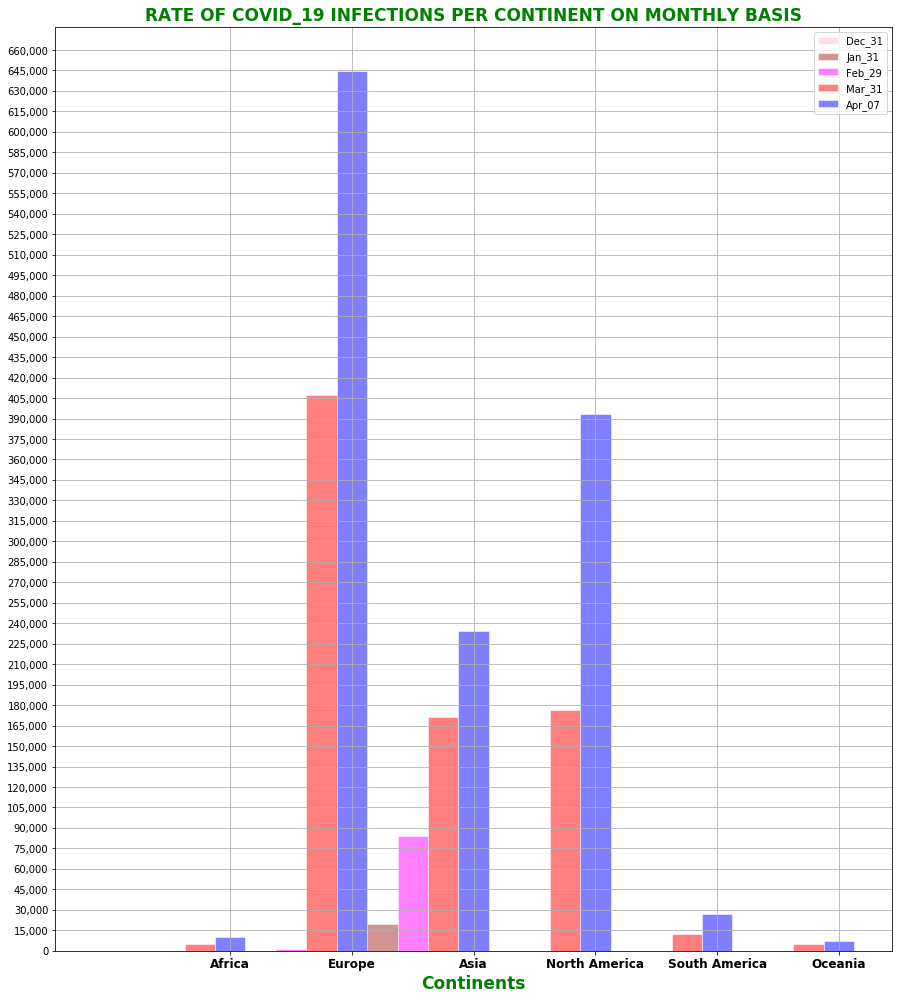

In [104]:
# set size of plot.
plt.rcParams['figure.figsize'] =(15,17)
# set title of plot
plt.title('RATE OF COVID_19 INFECTIONS PER CONTINENT ON MONTHLY BASIS',fontweight='bold',fontsize=17,color='green')

# set ticks on x-axis.
ax = plt.gca()
xticks = ax.xaxis.get_major_ticks()
xticks[0].set_visible(False)
# set x-axis tick labels
plt.xticks(np.arange(7),('','Africa','Europe','Asia','North America','South America','Oceania'),fontweight='bold',fontsize=12)

#set range and scale for y-axis and introduce thousand separators.
plt.yticks(np.arange(0,675000,15000))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x),',')))


#set height of bars according to rate of infections.
bars1 = [0,0,27,0,0,0]
bars2 = [0,17,19793,9,0,7]
bars3 = [3,1120,83969,84,1,26]
bars4 = [5064,407041,171643,176373,12351,5324]
bars5 = [9804,644857,234451,393585,27310,6981]

#set width of bars.
barWidth = 0.25                                  

# set positions of bars on x-axis.
p1 = np.linspace(0,5,6)
p2 = [x + barWidth for x in p1]
p3 = [x + barWidth for x in p2]
p4 = [x + barWidth for x in p3]
p5 = [x + barWidth for x in p4]

# plot bars
plt.bar(p1,bars1,color='pink',width=barWidth,alpha=0.5,edgecolor='white',label='Dec_31')
plt.bar(p2,bars2,color='brown',width=barWidth,alpha=0.5,edgecolor='white',label='Jan_31')
plt.bar(p3,bars3,color='magenta',width=barWidth,alpha=0.5,edgecolor='white',label='Feb_29')
plt.bar(p4,bars4,color='red',width=barWidth,alpha=0.5,edgecolor='white',label='Mar_31')
plt.bar(p5,bars5,color='blue',width=barWidth,alpha=0.5,edgecolor='white',label='Apr_07')

# set x_axis label and gridlines.
plt.xlabel('Continents',fontweight='bold', color='green',fontsize=17)
plt.grid()

# display legend of graph
plt.legend()
plt.show()


#  Analyses of the rate of cases and deaths worldwide.

In [105]:
data_set

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
0,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
1,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,"37,172,386.0",Asia
2,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,"37,172,386.0",Asia
3,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
4,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
...,...,...,...,...,...,...,...,...,...,...,...
9305,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa
9306,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa
9307,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa
9308,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa


## Grouping worldwide cases on monthly basis.

In [106]:
data_group1= data_set.groupby('month')
data_group1

In [107]:
for groups1,data1 in data_group1:
    print(groups1)
    
    print(data1,'\n')

1
        dateRep  day  month  year  cases  deaths countriesAndTerritories  \
57   2020-01-31   31      1  2020      0       0             Afghanistan   
58   2020-01-30   30      1  2020      0       0             Afghanistan   
59   2020-01-29   29      1  2020      0       0             Afghanistan   
60   2020-01-28   28      1  2020      0       0             Afghanistan   
61   2020-01-27   27      1  2020      0       0             Afghanistan   
...         ...  ...    ...   ...    ...     ...                     ...   
9266 2020-01-05    5      1  2020      0       0                 Vietnam   
9267 2020-01-04    4      1  2020      0       0                 Vietnam   
9268 2020-01-03    3      1  2020      0       0                 Vietnam   
9269 2020-01-02    2      1  2020      0       0                 Vietnam   
9270 2020-01-01    1      1  2020      0       0                 Vietnam   

     geoId countryterritoryCode  popData2018 continents  
57      AF                 

## December_31_2019

In [108]:
month_dec=data_group1.get_group(12)
month_dec

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
88,2019-12-31,31,12,2019,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
222,2019-12-31,31,12,2019,0,0,Algeria,DZ,DZA,"42,228,429.0",Africa
407,2019-12-31,31,12,2019,0,0,Armenia,AM,ARM,"2,951,776.0",Asia
522,2019-12-31,31,12,2019,0,0,Australia,AU,AUS,"24,992,369.0",Oceania
621,2019-12-31,31,12,2019,0,0,Austria,AT,AUT,"8,847,037.0",Europe
...,...,...,...,...,...,...,...,...,...,...,...
8599,2019-12-31,31,12,2019,0,0,Thailand,TH,THA,"69,428,524.0",Asia
8871,2019-12-31,31,12,2019,0,0,United Arab Emirates,AE,ARE,"9,630,959.0",Asia
8970,2019-12-31,31,12,2019,0,0,United Kingdom,UK,GBR,"66,488,991.0",Europe
9091,2019-12-31,31,12,2019,0,0,United States of America,US,USA,"327,167,434.0",North America


In [109]:
Dec_figures= month_dec[['cases','deaths']].sum()
Dec_figures

cases     27
deaths     0
dtype: int64

## January_31_2020

In [110]:
month_jan=data_group1.get_group(1)
month_jan

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
57,2020-01-31,31,1,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
58,2020-01-30,30,1,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
59,2020-01-29,29,1,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
60,2020-01-28,28,1,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
61,2020-01-27,27,1,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
...,...,...,...,...,...,...,...,...,...,...,...
9266,2020-01-05,5,1,2020,0,0,Vietnam,VN,VNM,"95,540,395.0",Asia
9267,2020-01-04,4,1,2020,0,0,Vietnam,VN,VNM,"95,540,395.0",Asia
9268,2020-01-03,3,1,2020,0,0,Vietnam,VN,VNM,"95,540,395.0",Asia
9269,2020-01-02,2,1,2020,0,0,Vietnam,VN,VNM,"95,540,395.0",Asia


In [111]:
jan_figures= month_jan[['cases','deaths']].sum()
jan_figures

cases     9799
deaths     213
dtype: int64

## February_29_2020

In [112]:
month_feb=data_group1.get_group(2)
month_feb

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
28,2020-02-29,29,2,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
29,2020-02-28,28,2,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
30,2020-02-27,27,2,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
31,2020-02-26,26,2,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
32,2020-02-25,25,2,2020,1,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
...,...,...,...,...,...,...,...,...,...,...,...
9235,2020-02-05,5,2,2020,1,0,Vietnam,VN,VNM,"95,540,395.0",Asia
9236,2020-02-04,4,2,2020,1,0,Vietnam,VN,VNM,"95,540,395.0",Asia
9237,2020-02-03,3,2,2020,1,0,Vietnam,VN,VNM,"95,540,395.0",Asia
9238,2020-02-02,2,2,2020,2,0,Vietnam,VN,VNM,"95,540,395.0",Asia


In [113]:
feb_figures= month_feb[['cases','deaths']].sum()
feb_figures

cases     75377
deaths     2708
dtype: int64

## March_31_2020

In [114]:
month_mar=data_group1.get_group(3)
month_mar

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
7,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
8,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,"37,172,386.0",Asia
9,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,"37,172,386.0",Asia
10,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,"37,172,386.0",Asia
11,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
...,...,...,...,...,...,...,...,...,...,...,...
9305,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa
9306,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa
9307,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa
9308,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa


In [115]:
mar_figures= month_mar[['cases','deaths']].sum()
mar_figures

cases     692593
deaths     34350
dtype: int64

## April_7_2020

In [116]:
month_apr=data_group1.get_group(4)
month_apr

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continents
0,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
1,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,"37,172,386.0",Asia
2,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,"37,172,386.0",Asia
3,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
4,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,"37,172,386.0",Asia
...,...,...,...,...,...,...,...,...,...,...,...
9294,2020-04-05,5,4,2020,0,0,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa
9295,2020-04-04,4,4,2020,1,0,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa
9296,2020-04-03,3,4,2020,0,0,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa
9297,2020-04-02,2,4,2020,0,0,Zimbabwe,ZW,ZWE,"14,439,018.0",Africa


In [117]:
apr_figures= month_apr[['cases','deaths']].sum()
apr_figures

cases     539192
deaths     36795
dtype: int64

## Dataframe showing rate of cases worldwide on monthly basis.

In [118]:
rate_of_infections = {'Months':['December_31','January_31','February_29','March_31','April_7'],'Cases':[27,27+9799,27+9799+75377,27+9799+75377+692593,27+9799+75377+692593+539192]}
infection_rate= pd.DataFrame(rate_of_infections)
infection_rate.set_index('Months',inplace=True)

# converting integers to floats and applying thousand separators.
infection_rate['Cases'] =pd.to_numeric(infection_rate['Cases'],downcast='float')
pd.options.display.float_format = '{:,}'.format
infection_rate

,Cases
Months,
December_31,27.0
January_31,"9,826.0"
February_29,"85,203.0"
March_31,"777,796.0"
April_7,"1,316,988.0"


## Graph showing rate of cases worldwide.

Text(0.5, 0, 'Months')

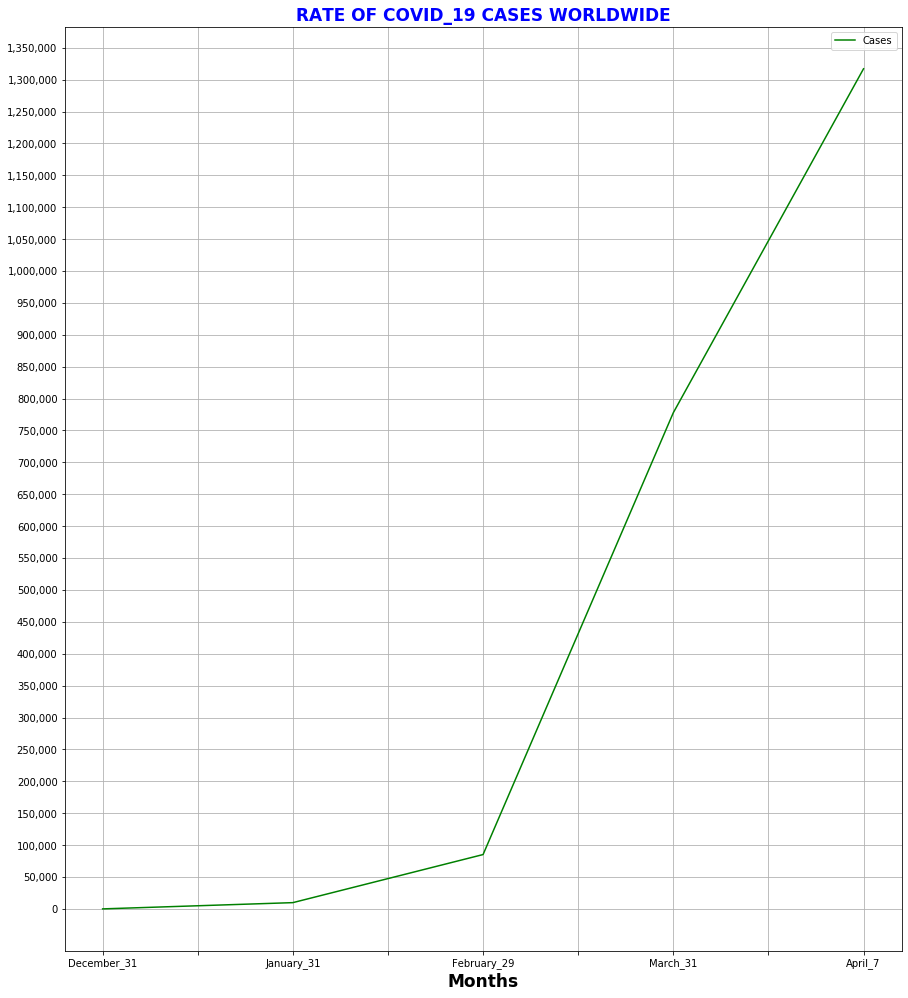

In [119]:
infection_rate.plot(color='green')
# set range and scale of y_axis ticks
plt.yticks(np.arange(0,1400000,50000))

# set plot title and gridlines
plt.title('RATE OF COVID_19 CASES WORLDWIDE',fontweight='bold',fontsize=17,color='blue')
plt.grid()
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x),',')))

# set x-axis label size
plt.rc('xtick', labelsize=12,)
plt.xlabel('Months',fontweight='bold',color='black',fontsize=17)

##  Dataframe showing rate of deaths worldwide on monthly basis..

In [120]:
rate_of_deaths = {'Months':['December_31','January_31','February_29','March_31','April_7'],'Deaths':[0,213,213+2708,213+2708+34350,213+2708+34350+36795]}
death_rate= pd.DataFrame(rate_of_deaths)
death_rate.set_index('Months',inplace=True)

# converting integers to floats and applying thousand separators.
death_rate['Deaths'] =pd.to_numeric(death_rate['Deaths'],downcast='float')
pd.options.display.float_format = '{:,}'.format
death_rate

,Deaths
Months,
December_31,0.0
January_31,213.0
February_29,"2,921.0"
March_31,"37,271.0"
April_7,"74,066.0"


## Graph showing rate of deaths worldwide

Text(0.5, 0, 'Months')

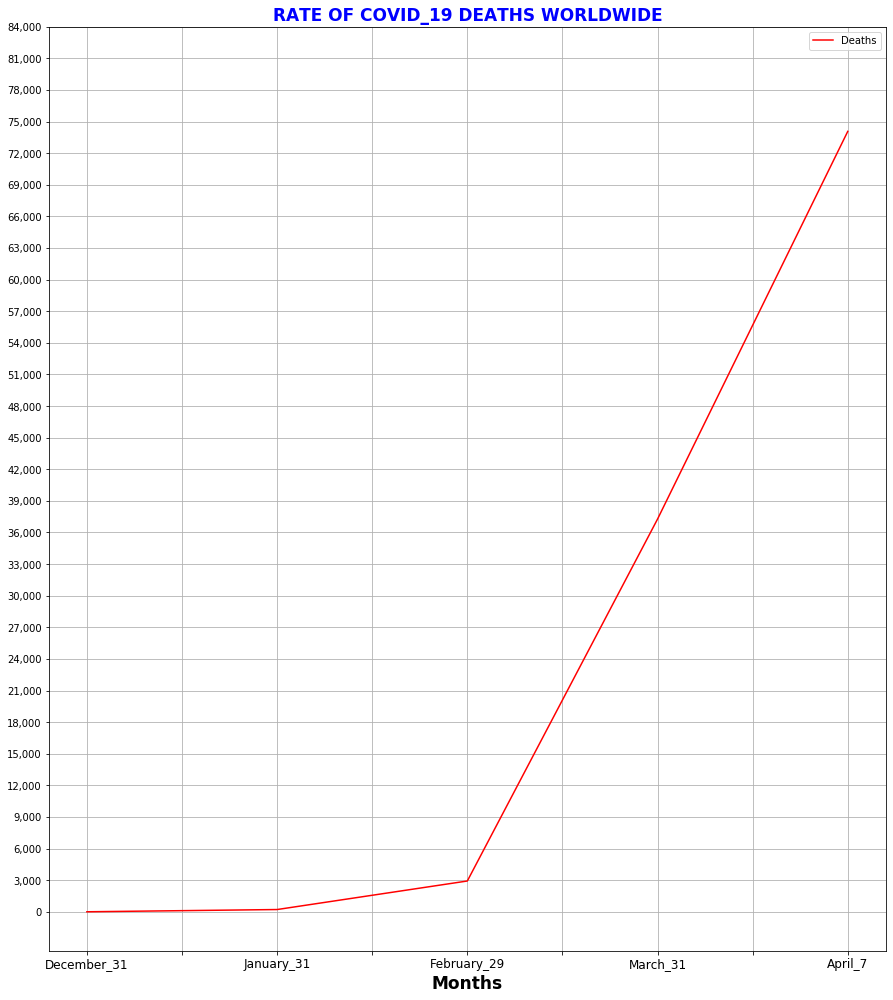

In [121]:
death_rate.plot(color='red')
plt.yticks(np.arange(0,85000,3000))
plt.grid()
plt.title('RATE OF COVID_19 DEATHS WORLDWIDE',fontweight='bold',fontsize=17,color='blue')
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x),',')))
plt.rc('xtick', labelsize=12)
plt.xlabel('Months',fontweight='bold',color='black',fontsize=17)